# house price prediction/regression

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams, rc_context
import seaborn as sns
%matplotlib inline
# from sklearn.preprocessing


In [2]:
# loading the data into the DataFrame
df = pd.read_csv('/Users/sahreenhaider/Documents/GitHub/data-science-complete-tutorial/Data/house_rental_data.csv.txt')

# High Level Data Understanding

In [3]:
# columns
df.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [4]:
# rows
df.index

RangeIndex(start=0, stop=645, step=1)

In [5]:
# shape of the dataframe
df.shape

(645, 8)

In [6]:
# length of the columns
len(df.columns)

8

In [7]:
# length of the rows 
len(df.index)

645

In [8]:
# data types of the particular columns
df.dtypes

Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [9]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [10]:
# describing the dataset here
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [11]:
# first 5 rows of the dataframe
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [12]:
# showing the first 5 and last 5 rows of the data

print(df.head())
print("--"*100)
print(df.tail())

   Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11          14        3            2         2   

   Price  
0  62000  
1  78000  
2  58000  
3  45000  
4  45000  
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
640         644  1359.156      7          15        3            2         2   
641         645   377.148      4          10        1            1         1   
642         646   740.06

# Low level Data Understanding

In [13]:
df.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [14]:
# Min priced house from the dataset
df.loc[df['Price']==df['Price'].min()]

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
609,613,996.24,4,5,3,2,1,6100


In [15]:
# MAX priced house from the data
df.loc[df['Price']==df['Price'].max()]

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
286,289,3504.63,13,14,2,2,2,250000


In [16]:
# MIN sized house from the data with respect to the area
df.loc[df['Sqft']==df['Sqft'].min()]

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
280,283,359.358,12,12,1,1,1,26000


In [17]:
# MAX sized house from the data with respect to the area
df.loc[df['Sqft']==df['Sqft'].max()]

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
572,576,5856.468,7,21,6,2,5,180000


# Data Visualization

/var/folders/m7/2q2nw8bx5jvc18fd_ry4hq840000gn/T/ipykernel_2835/523300247.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


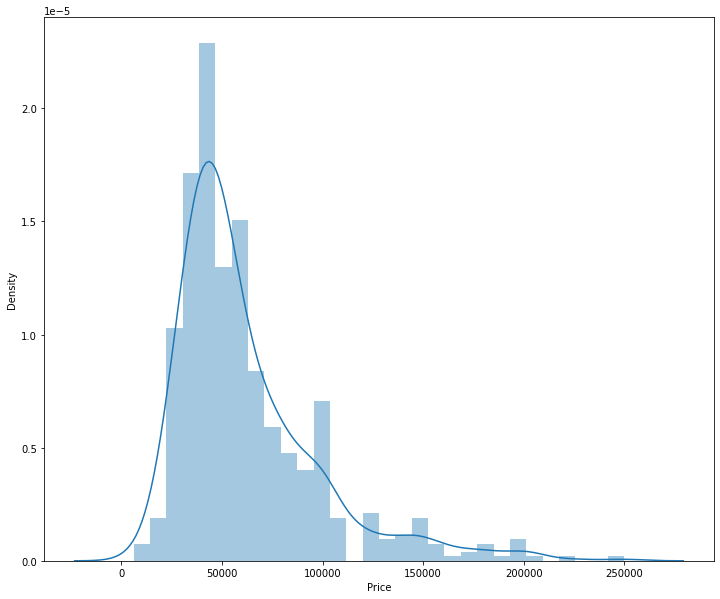

In [18]:
# checking the data for outliers
with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(12,10))
    sns.distplot(df['Price'])

/var/folders/m7/2q2nw8bx5jvc18fd_ry4hq840000gn/T/ipykernel_2835/3758627061.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price']);


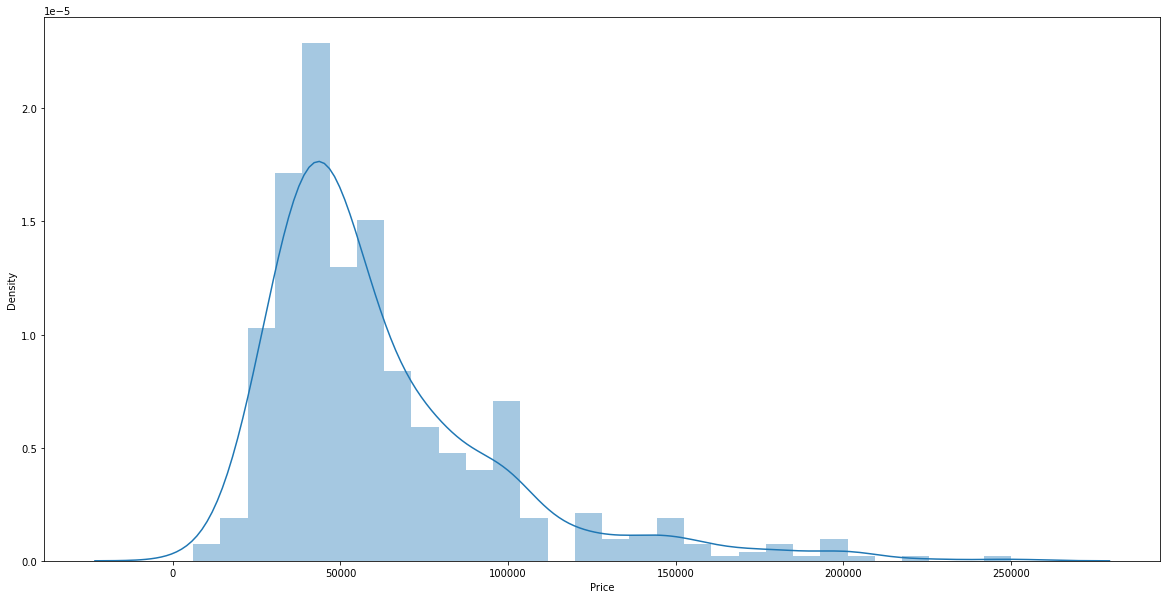

In [19]:
with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(20,10))
    sns.distplot(df['Price']);

In [20]:
df.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [21]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [22]:
# checking the correlation among the data
df.corr()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Unnamed: 0,1.000000,-0.065182,-0.021299,-0.039687,-0.008638,-0.027035,-0.007877,-0.077512
Sqft,-0.065182,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,-0.021299,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,-0.039687,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,-0.008638,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,-0.027035,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,-0.007877,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,-0.077512,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


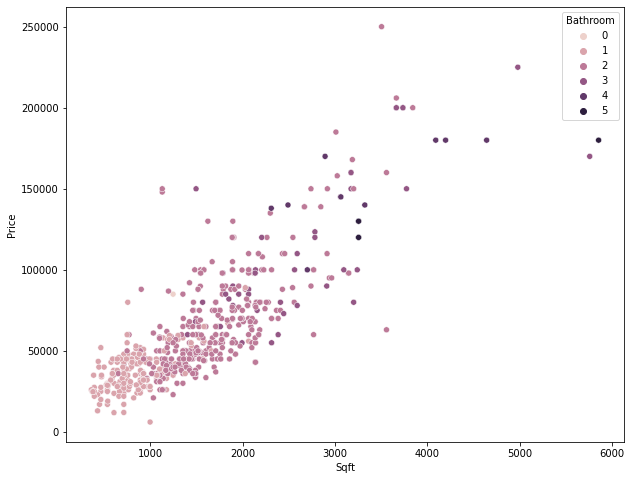

In [23]:
# scatterplot 
with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=df, x='Sqft', y='Price',hue='Bathroom');

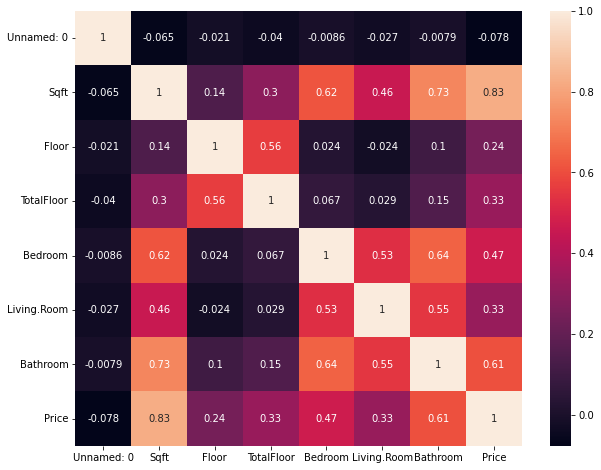

In [24]:
# correlation using heatmap
with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True);


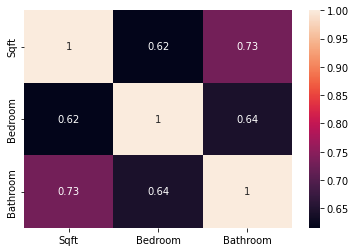

In [25]:
with rc_context({'figure.facecolor':'white'}):
    sns.heatmap(df[['Sqft', 'Bedroom', 'Bathroom']].corr(), annot=True)

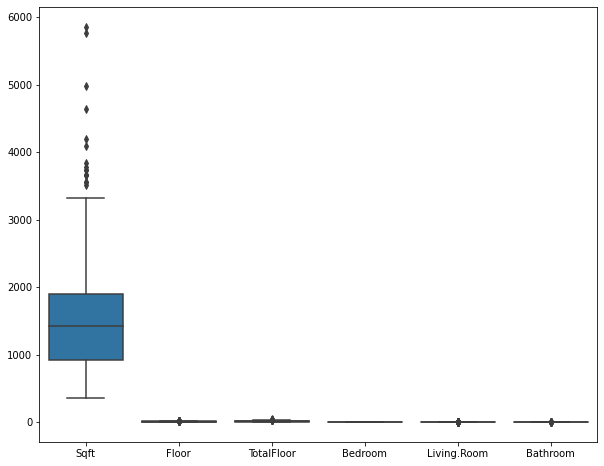

In [26]:
# box plot for checking outliers
with rc_context({'figure.facecolor':'white'}):
    plt.figure(figsize=(10,8))
    sns.boxplot(df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room','Bathroom']])

/var/folders/m7/2q2nw8bx5jvc18fd_ry4hq840000gn/T/ipykernel_2835/1299826171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sqft']);


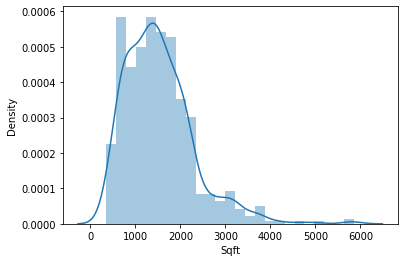

In [27]:
sns.distplot(df['Sqft']);

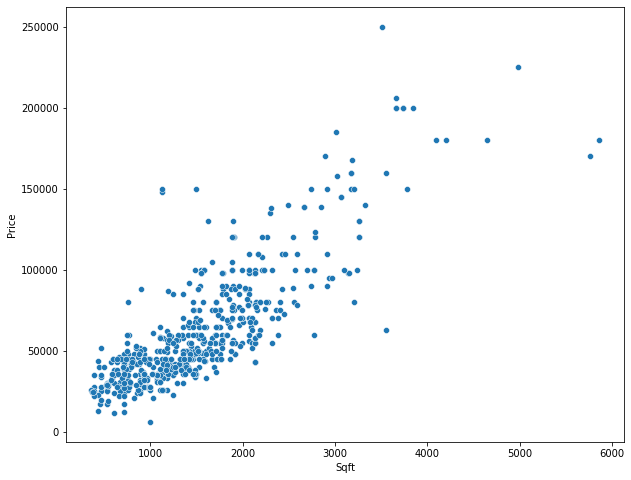

In [28]:
with rc_context({'figure.facecolor':'white'}):

       plt.figure(figsize=(10,8))
       sns.scatterplot(data=df, x='Sqft', y='Price')

In [29]:
df.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [30]:
# with rc_context({'figure.facecolor':'white'}):
#     sns.pairplot(data=df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room','Bathroom', 'Price']]);

# Data Cleaning

In [31]:
df.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [32]:
df.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

In [33]:
df.set_index(['Unnamed: 0'], inplace=True)

In [34]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Unnamed: 0,,,,,,,
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


# Model

In [35]:
# loading the standard scaler fn 
scaler = StandardScaler()

In [36]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [37]:
df['Price'].head()

Unnamed: 0
1    62000
2    78000
3    58000
4    45000
5    45000
Name: Price, dtype: int64

In [38]:
# fiting and returning the scaled data and saving it in the dataframe
df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']] = scaler.fit_transform(df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']])

In [39]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Unnamed: 0,,,,,,,
1,-0.456393,-1.014897,-0.772347,-0.828956,0.402694,0.276918,62000
2,0.791798,-0.242042,-0.772347,1.151328,0.402694,0.276918,78000
3,-0.507434,-0.242042,-0.772347,-0.828956,0.402694,-1.187117,58000
4,-0.089824,-1.014897,-0.772347,0.161186,0.402694,0.276918,45000
5,-0.730160,1.303669,0.629803,0.161186,0.402694,0.276918,45000


In [40]:
X = df[['Sqft', 'Bedroom', 'Bathroom']]

In [41]:
y = df['Price']

In [42]:
X.shape

(645, 3)

In [43]:
y.shape

(645,)

In [44]:
# doing the train test split on the data here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(516, 3)
(129, 3)
(516,)
(129,)


In [46]:
# checking the RMSE values for different values of K.
rmse_val = []

for K in range(1,10):
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_val.append(error)
    print(K,error)

1 27039.374834666804
2 25021.74093105694
3 21936.18553798572
4 20909.217465750335
5 21055.972198533753
6 21690.544391161024
7 21984.517012330845
8 22389.319184903077
9 22537.297072875408


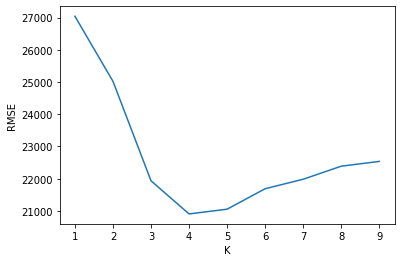

In [47]:
# line plot of RMSE vs K
with rc_context({'figure.facecolor':'white'}):
        
    k_range = range(1,10)
    plt.plot(k_range, rmse_val)
    plt.xlabel('K')
    plt.ylabel('RMSE')
    plt.show()

In [48]:
# optimal Model
model = KNeighborsRegressor(n_neighbors = 4)
model.fit(X_train, y_train)
pred = model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, pred))
r_squared = r2_score(y_test,pred)
print("RMSE: ", error,'\n', 'r2: ',r_squared)

RMSE:  20909.217465750335 
 r2:  0.6855299520304474
